# <center>**Autism Classifier**<center>


**Introduction**

>
Autism is a disorder that affects social skills and causesw reptitive interests and movements. According to the centers of disease control, 1 in 36 children are diagnosed with autism. The earlier one can gain a diagnosis the sooner the person can get help for the things that trouble them. There has been a rise in cases of autism causing it to become harder to get an actual diagnosis. An online test will allow someone to decide whether or not they need furter testing from a doctor to recieve a formal diagnosis.

Three algorithms will be used during this study. Those algorithms are logistic regression, support vector machine, and artificial neural network. Three different models will be built to see which one works the best.

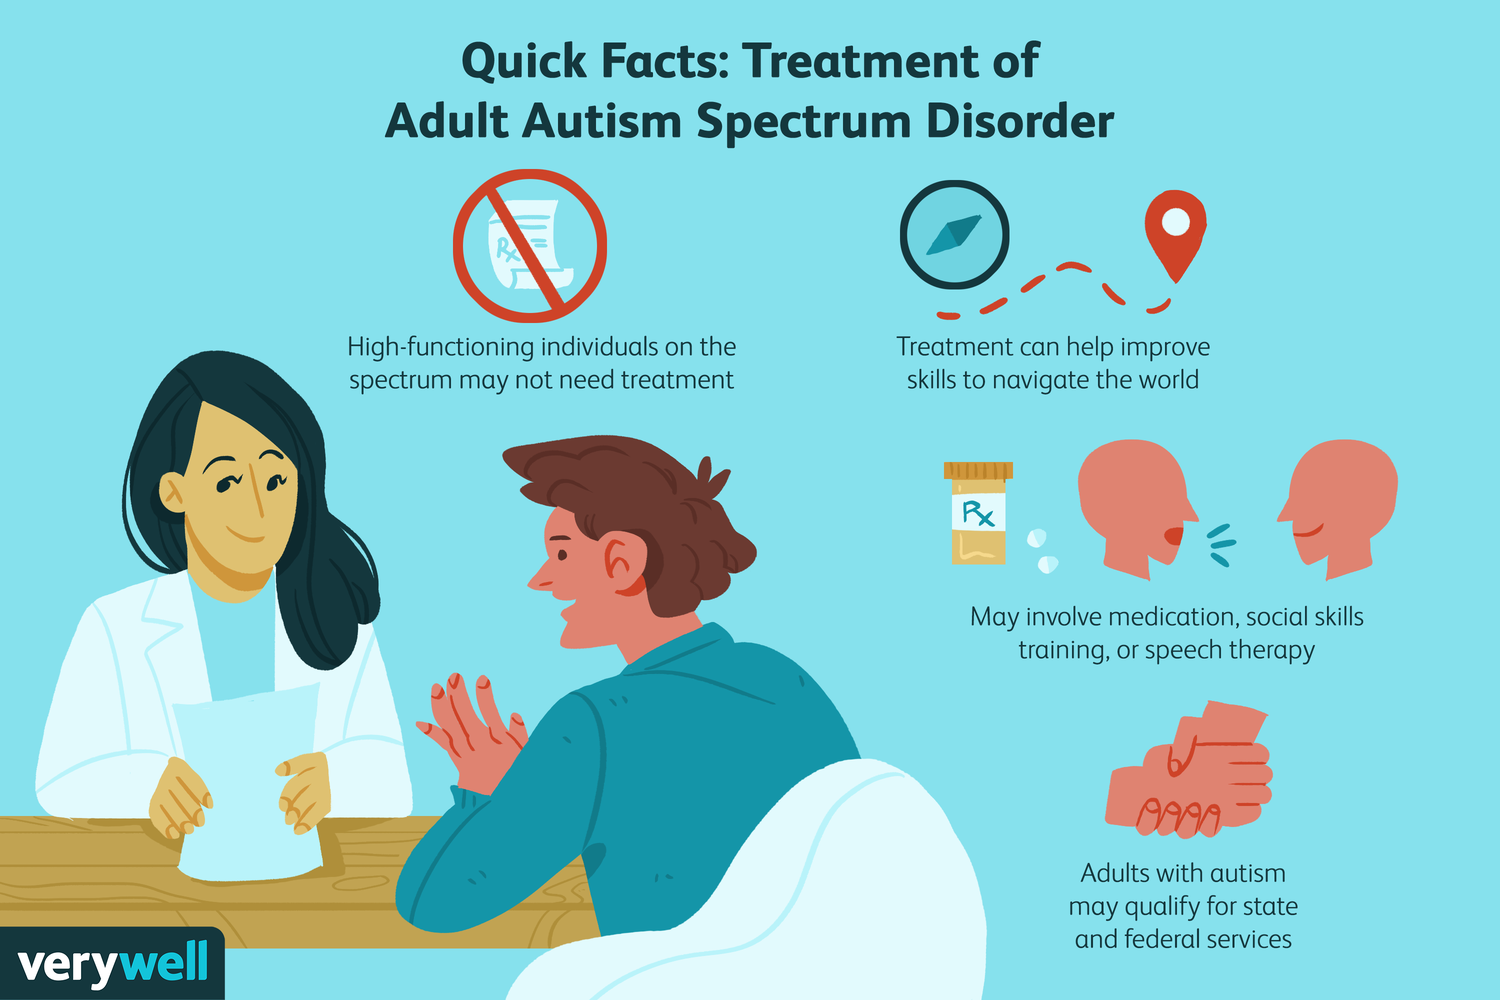


**Discussion**: This dataset contains information that can be used to analyze whether someone has autism or not. The data contains binary scores from assesment questions, biological factors, and environmental factors.


**Data Set Name**: Autism Spectrum Disorder Screening Data for Adults

*   The data was collected by Fadi Fayez Thabtah Department of Digital Technology Manukau Institute of Technology, Auckland, New Zealand.
*   Data taken from UC Irvine Machine Learning Repository.
*   Data Collected off of a screening app.

**Samples Collected**: 704








**Data**

File name: Autism-Adult-Data.csv

Attributes will be used to classify "YES" for Autism and "NO" for no Autism.

Attributes:
* Age
* Gender
* A_1 through A_10 scores - Assement question scored binary 0 to 1
* Autism - Whether they have a family memeber with a personality disorder
* Ehtnicity
* Jundice - Whther they had or didn't have Jaundice, yellowing of the skin due to an excess amount of bilibrubin circulating in the blood stream, at birth
* Country
* Result - Assement results ranging from 0 to 10


Unecessary Data:

*   Age Description
*   Used App Before
*   Relation

Independent variables:

*   Age - Nominal
*   Assement Scores 1 through 10 - Nominal
*   Autism - Ordinal
*   Ethnicity - Ordinal
*   Jundice - Ordinal
*   Country - Nominal
*   Result - Ordinal

Dependent variable:
*   Class/ASD - Ordinal

## Import Dependicies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Loading Data

In [ ]:
df = pd.read_csv("Autism-Adult-Data.csv", header=0,
                 delimiter=r",\s*" ,na_values='?', engine='python')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

## Check to See if data is Unbalanced

In [ ]:
size_of_each_group = df.groupby('Class/ASD').size().sort_values(ascending=False)
print(size_of_each_group)

Class/ASD
NO     515
YES    189
dtype: int64


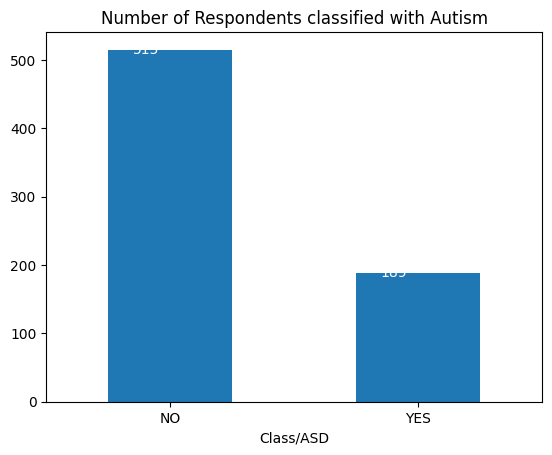

In [ ]:
ax = size_of_each_group.plot(
    kind='bar', rot=0)
ax.set_title("Number of Respondents classified with Autism", fontsize=12)
for x, y in zip(np.arange(0, len(size_of_each_group)), size_of_each_group):
    ax.annotate("{:d}".format(y), xy=(x-(0.15 if len(str(y)) == 3 else 0.1), y-6), fontsize=10, color="white")

There is approximately 76% respondents for the negative class and 26% respondents for the positive class which suggest an imbalance of data. This data could effect model bias and performance metrics.

## Organizing Data

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [ ]:
df.isna().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [ ]:
#Add column names
df.columns=['A1_Score',	'A2_Score',	'A3_Score',	'A4_Score',	'A5_Score',	'A6_Score',	'A7_Score',	'A8_Score',	'A9_Score',	'A10_Score',	'age',	'gender',	'ethnicity',	'jundice',	'austim',	'contry_of_res',	'used_app_before',	'result',	'age_desc',	'relation',	'Class/ASD']
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [ ]:
#drop unecessary data
df = df.drop(columns=['age_desc', 'relation', 'used_app_before'])  # Delete the age_desc, Class/ASD, relation, and used_app_before columns
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',6,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,f,White-European,no,no,Russia,7,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,m,Hispanic,no,no,Mexico,3,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,f,NaN,no,no,Russia,7,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,m,'South Asian',no,no,Pakistan,6,NO


In [ ]:
print(df.isna().sum())
print(df.shape)

A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
age               2
gender            0
ethnicity        95
jundice           0
austim            0
contry_of_res     0
result            0
Class/ASD         0
dtype: int64
(704, 18)


In [ ]:
#remove rows with missing data
df1 = df.dropna(axis=0)
df1.shape

(609, 18)

In [ ]:
df1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',6,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,Others,yes,no,'United States',9,YES


In [ ]:
# Check all possible values for gender.
print("gender values")
pd.unique(df1['gender'])

gender values


array(['f', 'm'], dtype=object)

In [ ]:
# Check all possible values for jundice.
print("jundice")
pd.unique(df1['jundice'])

jundice


array(['no', 'yes'], dtype=object)

In [ ]:
# Check all possible values for austim.
print("austim values")
pd.unique(df1['austim'])

austim values


array(['no', 'yes'], dtype=object)

In [ ]:
# Check all possible values for Class/Asd.
print("Class/ASD values")
pd.unique(df1['Class/ASD'])

Class/ASD values


array(['NO', 'YES'], dtype=object)

In [ ]:
#disable copyonwrite warning. Optional.
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
#mapping values
gender_mapping = {'f': 0, 'm': 1}
df1['gender'] = df1['gender'].map(gender_mapping)

jundice_mapping = {'no': 0, 'yes': 1}
df1['jundice'] = df1['jundice'].map(jundice_mapping)

class_mapping = {'NO': 0, 'YES': 1}
df1['Class/ASD'] = df1['Class/ASD'].map(class_mapping)


In [ ]:
#Convert binary categorical target
target_mapping = {label: idx for idx, label in enumerate(np.unique(df['austim']))}
df1['austim'] = df1['austim'].map(target_mapping)
target_mapping

{'no': 0, 'yes': 1}

In [ ]:
df1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,'United States',6,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,5,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,8,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,'United States',6,0
5,1,1,1,1,1,0,1,1,1,1,36.0,1,Others,1,0,'United States',9,1


In [ ]:
# Label encoding with Pandas get_dummies method
df3 = pd.get_dummies(df1.iloc[:, :-1], drop_first=True)
df3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res_Portugal,contry_of_res_Romania,contry_of_res_Russia,contry_of_res_Serbia,contry_of_res_Spain,contry_of_res_Sweden,contry_of_res_Tonga,contry_of_res_Turkey,contry_of_res_Ukraine,contry_of_res_Uruguay
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [ ]:
X = df3.iloc[:, :-1].values
y = df1.iloc[:, -1].values
print(X[::1000, :])
print(y[::1000,])

[[ 1.  1.  1.  1.  0.  0.  1.  1.  0.  0. 26.  0.  0.  0.  6.  0.  0.  0.
   0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.25,
                     stratify=y,
                     random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(456, 83)
(153, 83)


In [ ]:
print(y_test)

[0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0]


## Standardized The Data

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[:5,:])
print(X_test_std[:5, :])

[[-1.71202643 -0.89178226 -0.94451902  0.97402153 -1.06810349 -0.65533738
   1.12634662 -1.42122044 -0.73875755  0.81873663 -0.08242575 -1.09192843
  -0.32679675 -0.39668679 -0.81486421 -0.25577443 -0.52320456 -0.26537245
  -0.15722309 -0.17797249 -0.23047295 -0.14973819 -0.10529233  1.30930734
  -0.04688072  0.         -0.39668679 -0.06637233 -0.04688072 -0.06637233
  -0.15722309 -0.34299717  2.61955511 -0.46824282 -0.10529233 -0.12486072
  -0.04688072  0.         -0.06637233 -0.04688072 -0.21971769 -0.08137885
  -0.04688072 -0.06637233 -0.04688072 -0.04688072 -0.10529233 -0.04688072
  -0.14189513  0.         -0.04688072 -0.04688072  0.         -0.04688072
  -0.04688072  0.         -0.14189513 -0.08137885 -0.04688072 -0.4077259
   0.         -0.06637233 -0.04688072 -0.10529233 -0.09407209 -0.04688072
  -0.12486072 -0.04688072 -0.12486072 -0.04688072 -0.04688072 -0.04688072
  -0.06637233 -0.08137885 -0.04688072 -0.04688072 -0.06637233 -0.04688072
  -0.06637233 -0.04688072 -0.04688072 -

## Logistic Regression

Logistic regression is a linear classification technique that estimates the probability of an observation belonging to a specific category within a binary outcome using input features.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Logistic Regression Grid Search
log_reg = LogisticRegression()
param_grid = {
    'C': [0.005, 0.008, 0.009, 0.01],  # Regularization parameter
}

In [ ]:
gs = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.005, 0.008, 0.009, 0.01]}, scoring='accuracy')

In [ ]:
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(C=0.01)
0.9714912280701754


In [ ]:
lr1 = LogisticRegression(C=0.01)

In [ ]:
lr1.fit(X_train, y_train)
print("The score for training data is:", lr1.score(X_train, y_train))
print("The score for testing data is:", lr1.score(X_test, y_test))

The score for training data is: 0.9956140350877193
The score for testing data is: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Usingcross-validation to check for consistensy in a high training score.
scores = cross_val_score(estimator = lr1,
                        X=X_train, y=y_train,
                        cv=5, n_jobs = -1)
print(scores)
print(scores.mean())

[0.97826087 0.98901099 0.98901099 0.96703297 0.98901099]
0.9824653607262303


**Testing out higher regularization due to concerns of overfitting.**

In [ ]:
lr2 = LogisticRegression(C=0.009)

In [ ]:
lr2.fit(X_train, y_train)
print("The score for training data is:", lr2.score(X_train, y_train))
print("The score for testing data is:", lr2.score(X_test, y_test))

The score for training data is: 0.993421052631579
The score for testing data is: 0.9934640522875817


In [ ]:
#Usingcross-validation to check for consistensy in a high training score.
scores = cross_val_score(estimator = lr2,
                        X=X_train, y=y_train,
                        cv=5, n_jobs = -1)
print(scores)
print(scores.mean())

[0.97826087 0.98901099 0.98901099 0.95604396 0.97802198]
0.9780697563306259


## Support Vector Machine

Support Vector Machine (SVM) is a versatile machine learning algorithm for classification and regression. It finds the best boundary between data points, maximizing the margin for accurate predictions in high-dimensional spaces.


In [ ]:
from sklearn.svm import SVC

In [ ]:
#SVM Grid Search
C_range = np.logspace(-2, 4, 7)
gamma_range = np.logspace(-4, 2, 7)
print(gamma_range)
print(C_range)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


In [ ]:
param_grid = [{'C': C_range, 'kernel': ['linear']},
    {'C': C_range, 'degree':[2,3,4], 'kernel':['poly']},
    {'C': C_range,
    'gamma': gamma_range,
    'kernel': ['rbf']}]

In [ ]:
svc = SVC()
gsSVC = GridSearchCV(estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1)

In [ ]:
gsSVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'kernel': ['linear']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'degree': [2, 3, 4], 'kernel': ['poly']},
                         {'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                          'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [ ]:
print(gsSVC.best_estimator_)
print(gsSVC.best_score_)

SVC(C=0.01, kernel='linear')
1.0


In [ ]:
svc = SVC(C=0.01, kernel='linear', gamma=1e0, random_state = None, max_iter=1000)

In [ ]:
svc.fit(X_train_std, y_train)
print("The score for training data is: ", svc.score(X_train_std, y_train))
print("The score for training data is: ", svc.score(X_test_std, y_test))

The score for training data is:  0.9824561403508771
The score for training data is:  0.954248366013072


## Artificial Neural Network (MLP)


An artificial neural network has a set of layers that contain nodes which are interconnected and organized into input, hidden, and output layers, forming a network capable of learning complex patterns and relationships within data through a process called forward and backward propagation.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

In [ ]:
gsMLP = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy')

In [ ]:
gsMLP.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='accuracy')

In [ ]:
print(gsMLP.best_estimator_)
print(gsMLP.best_score_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50))
0.9649122807017544


In [ ]:
mlp = MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(50, 50))

In [ ]:
mlp.fit(X_train_std, y_train)
print("The score for training data is: ", mlp.score(X_train_std, y_train))
print("The score for testing data is: ", mlp.score(X_test_std, y_test))

The score for training data is:  1.0
The score for testing data is:  0.9411764705882353


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Compare Models

In [ ]:
# Training accuracies
logistic_regression_train_accuracy = 0.993421052631579
svm_train_accuracy = 0.9824561403508771
mlp_train_accuracy = 1.0

# Testing accuracies
logistic_regression_test_accuracy = 0.9934640522875817
svm_test_accuracy = 0.954248366013072
mlp_test_accuracy = 0.934640522875817

In [ ]:
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

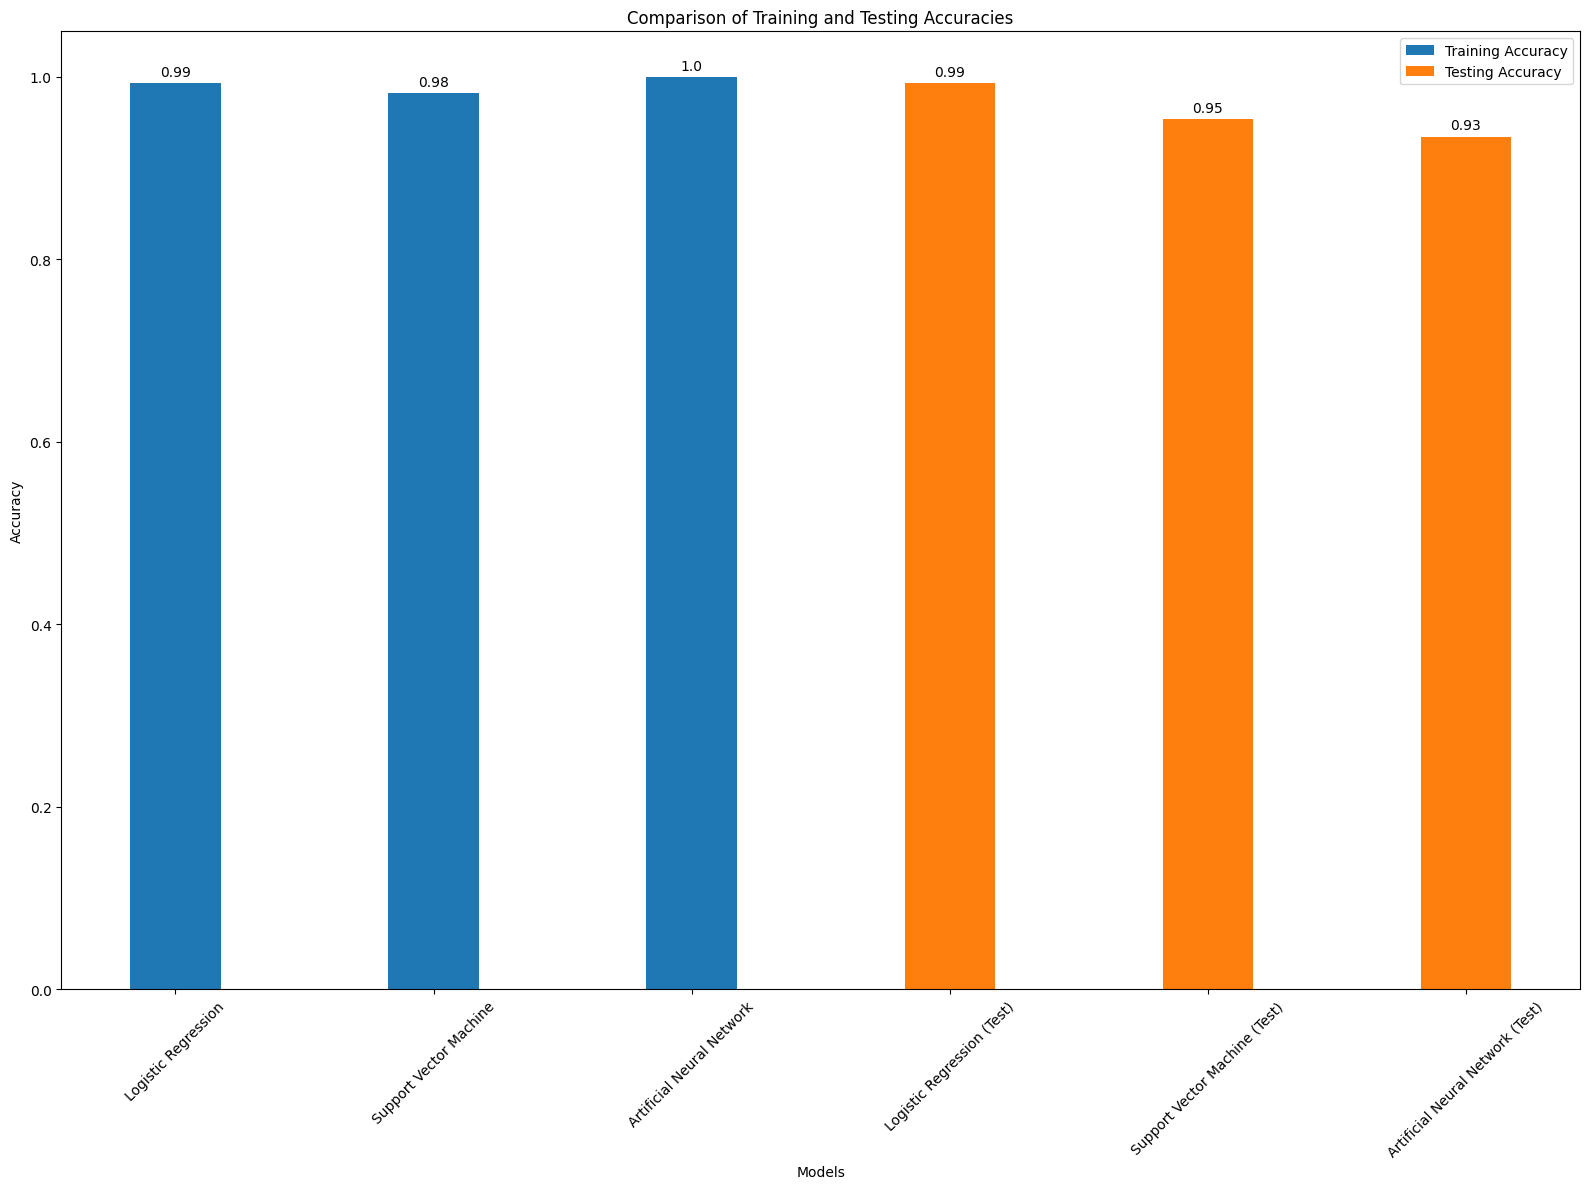

In [ ]:
# Plotting the accuracies of the models on both training and testing datasets
models = ['Logistic Regression', 'Support Vector Machine', 'Artificial Neural Network']
train_accuracies = [logistic_regression_train_accuracy, svm_train_accuracy, mlp_train_accuracy]
test_accuracies = [logistic_regression_test_accuracy, svm_test_accuracy, mlp_test_accuracy]

# Set the width of the bars
bar_width = 0.35

fig, ax = plt.subplots(figsize=(16, 12))
bar1 = ax.bar(models, train_accuracies, bar_width, label='Training Accuracy')
bar2 = ax.bar([model + ' (Test)' for model in models], test_accuracies, bar_width, label='Testing Accuracy')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracies')
ax.legend()

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.tight_layout()
plt.show()

## Best Model Test Results

Logistic Regression had the best results for training and testing.





In [ ]:
estimator = lr2

In [ ]:
y_train_pred = estimator.predict(X_train)
y_test_pred = estimator.predict(X_test)

In [ ]:
print(y_test_pred) #prediction

[0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0]


In [ ]:
print(y_test) #target?

[0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision = precision_score(y_test, y_test_pred) #ratio of correctly predicted positive observations to the total predicted positives.
recall = recall_score(y_test, y_test_pred) #ratio of correctly predicted positive observations to all actual positives.
f1 = f1_score(y_test, y_test_pred) #mean of precision and recall

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 1.0000
Recall: 0.9778
F1 Score: 0.9888


The logistic regression model has a high precision, recall, and f1 score meaning there is a low percentage of false positives. This suggests that this model pefroms very well on unseen data.

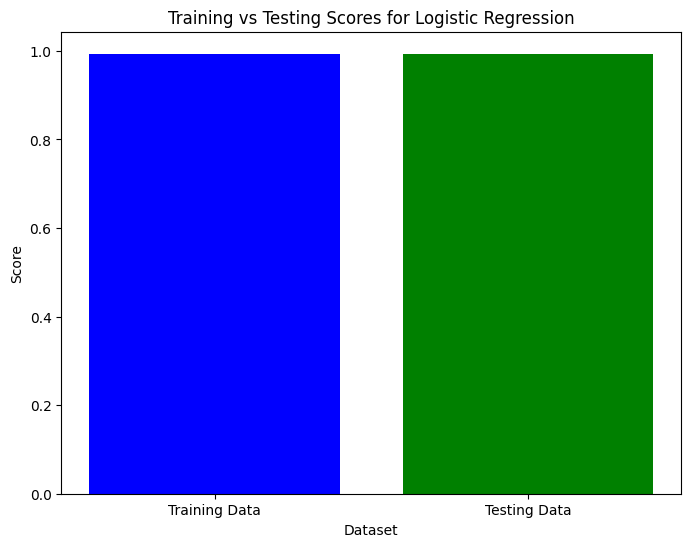

In [ ]:


# Scores for training and testing data
training_score = 0.993421052631579
testing_score = 0.9934640522875817

# Labels for the bars
labels = ['Training Data', 'Testing Data']

# Values for the bars
scores = [training_score, testing_score]

# Creating the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['blue', 'green'])

# Adding title and labels
plt.title('Training vs Testing Scores for Logistic Regression')
plt.xlabel('Dataset')
plt.ylabel('Score')

# Displaying the plot
plt.show()


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

In [ ]:
print(cm_train)
print(cm_test)

[[321   0]
 [  3 132]]
[[108   0]
 [  1  44]]


In [ ]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          count=0):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    if count != 0:
        cm = cm[:count, :count]
        classes=classes[:count]

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, origin='lower')
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[321   0]
 [  3 132]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

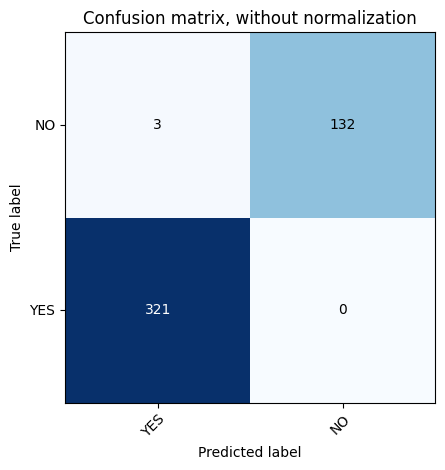

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, classes=["YES", "NO"])

Normalized confusion matrix
[[1.         0.        ]
 [0.02222222 0.97777778]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

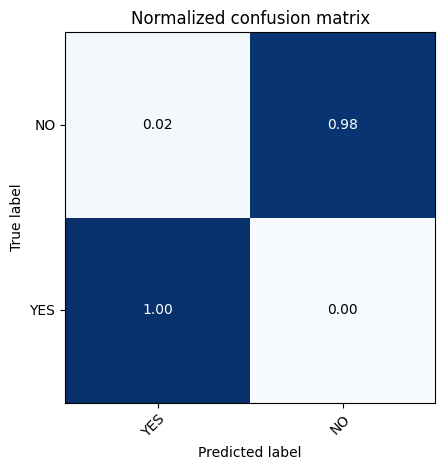

In [ ]:
plot_confusion_matrix(y_test, y_test_pred, classes=["YES", "NO"], normalize=True)

## Conclusion

Each model produced a high percentage of accurate results for training and testing. During this project, we had to deal with unbalanced data and the possibility of overfitting. Overall, the best model for training and testing was logistic regression. The model performed very well on unseen data with an f1 score of 98.9%. This model could be useful as an automatic calculation of results at the end of the online line application. It will allow people to get diagnosis for autism more accessible which will put people in the right direction to getting the help they need.


## References

1. Thabtah,Fadi. (2017). Autism Screening Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5F019.
2. “Data & Statistics on Autism Spectrum Disorder.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 4 Apr. 2023, www.cdc.gov/ncbddd/autism/data.html.
3. “Know More. Feel Better.” Verywell Health, Verywell Health, 29 Jan. 2020, www.verywellhealth.com/.
4. “Signs of Mild Autism in Adults.” Mya Care, Health and Wellness Simplified, myacare.com/blog/signs-of-mild-autism-in-adults. Accessed 28 Nov. 2023.
